In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

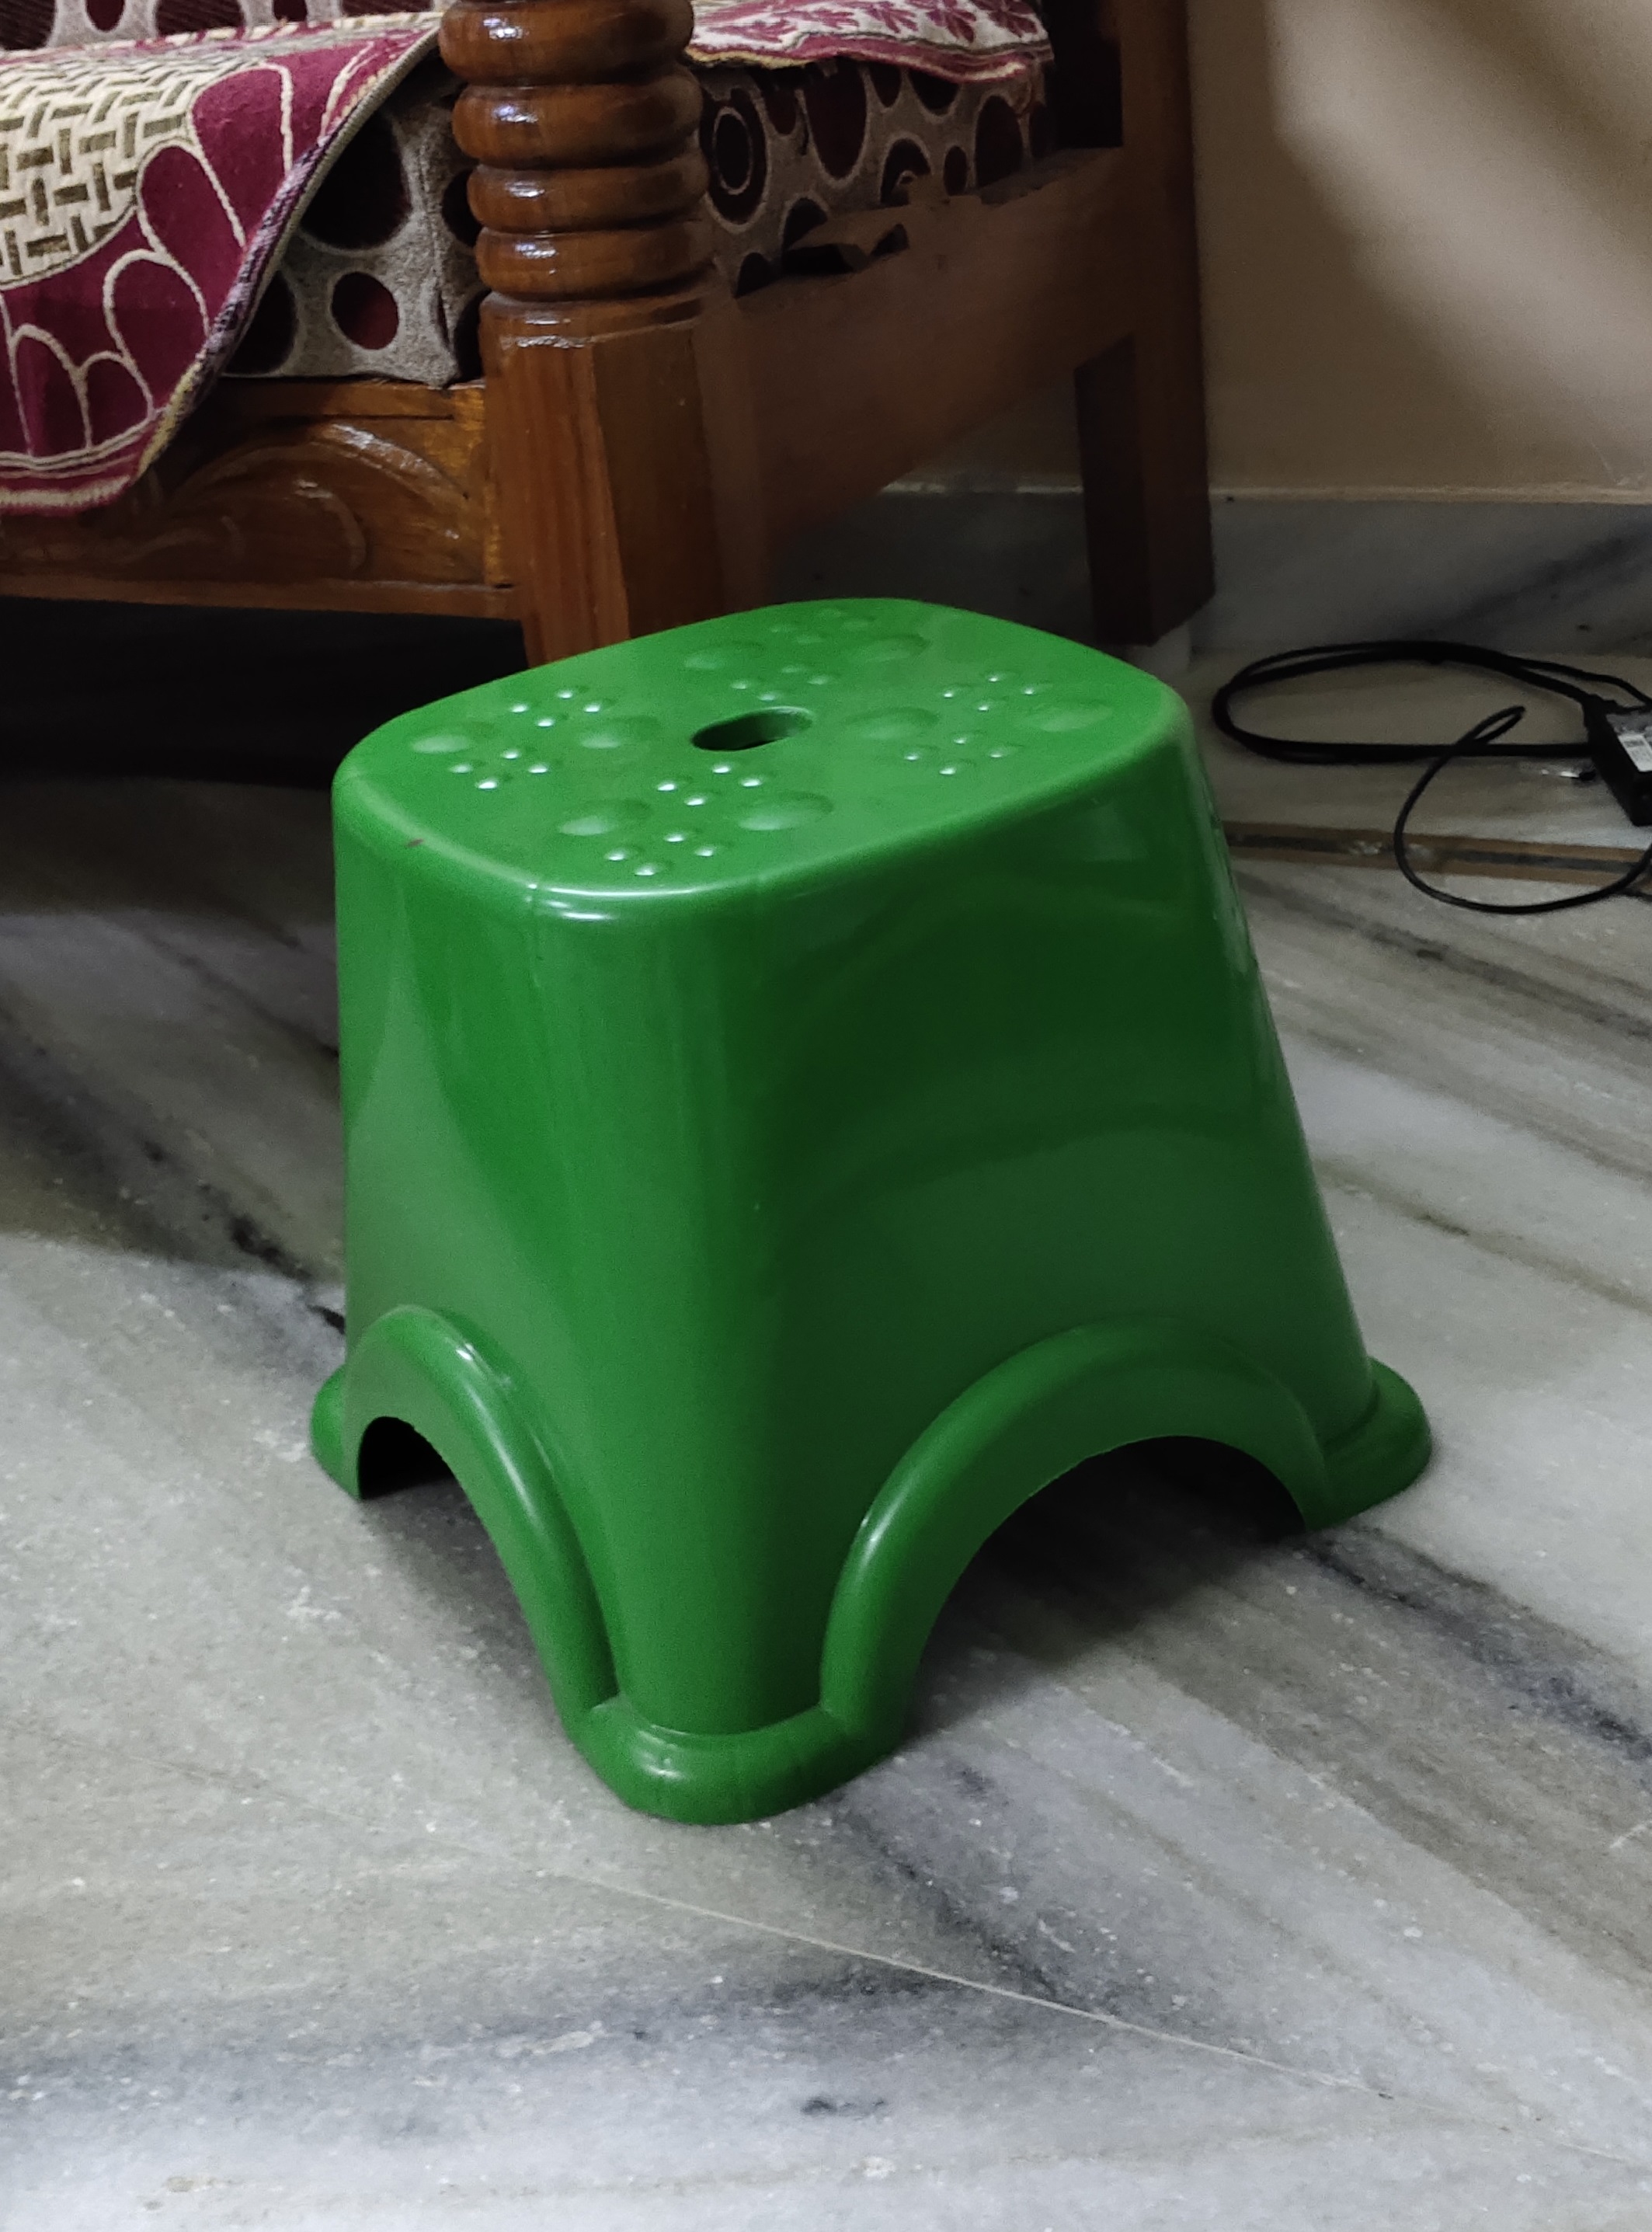

In [2]:
image_original = cv2.imread("chair.jpg",cv2.IMREAD_COLOR)
cv2_imshow(image_original)

In [3]:
image_original.shape

(2873, 2127, 3)

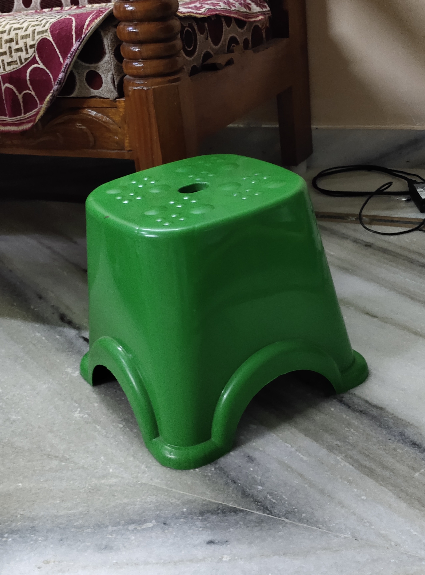

In [4]:
image = cv2.resize(image_original,None,fx=0.2,fy=0.2,interpolation= cv2.INTER_CUBIC)
cv2_imshow(image)

In [5]:
image.shape

(575, 425, 3)

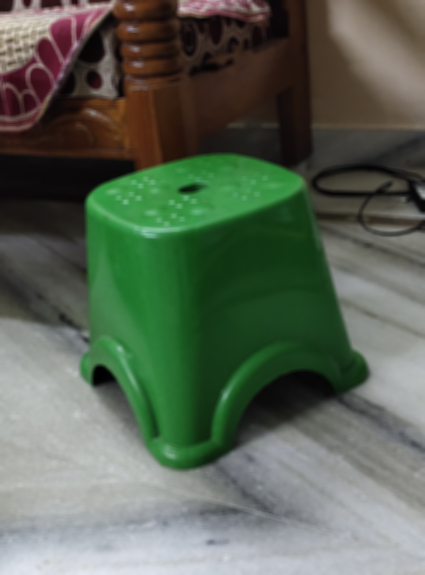

In [6]:
gauss = cv2.GaussianBlur(image,(5,5),9)
cv2_imshow(gauss)

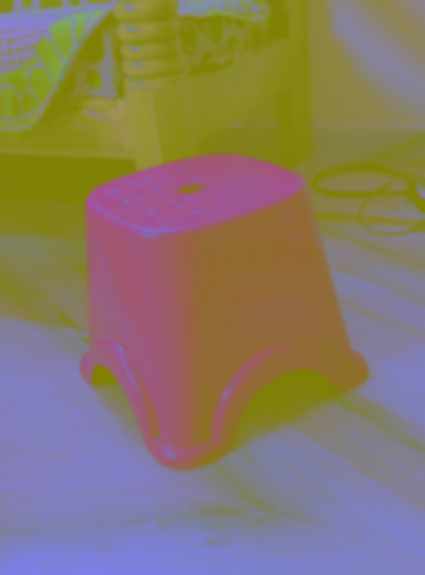

In [7]:
lab = cv2.cvtColor(gauss,cv2.COLOR_BGR2Lab)
cv2_imshow(lab)

In [8]:
""" Lower color limit """
l_low = 0
a_low = 0
b_low = 0

""" Upper Color Limit """
l_up  = 255
a_up  = 117
b_up  = 255

lower = [l_low,a_low,b_low]
upper = [l_up,a_up,b_up]

lower=np.array(lower,dtype=np.uint8)
upper=np.array(upper,dtype=np.uint8)

print(lower)
print(upper)

[0 0 0]
[255 117 255]


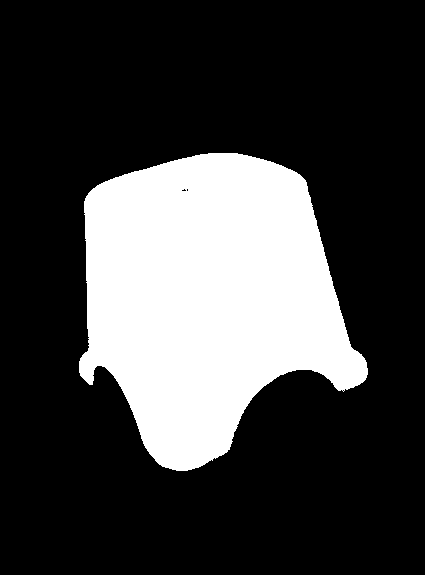

In [9]:
chair_rough = cv2.inRange(lab,lower,upper)
cv2_imshow(chair_rough)

In [10]:
contours, hierarchy = cv2.findContours(chair_rough,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

4

In [11]:
chair_contour = max(contours,key= cv2.contourArea)

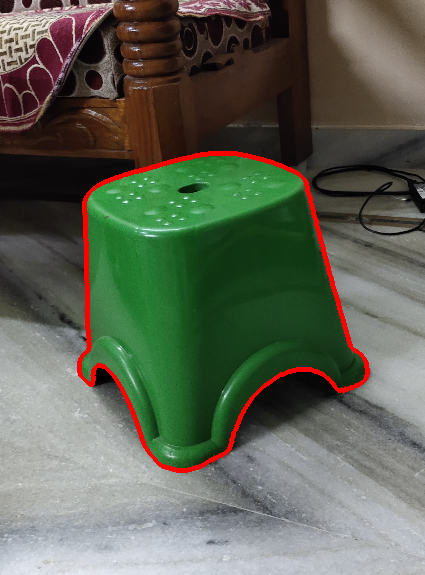

In [12]:
image1 = image.copy()
cv2.drawContours(image1,[chair_contour],0,(0,0,255),3)
cv2_imshow(image1)

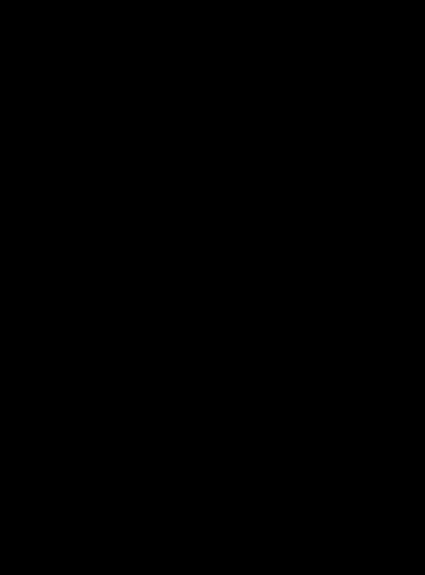

In [13]:
mask = np.zeros(image.shape,dtype=image.dtype)
cv2_imshow(mask)

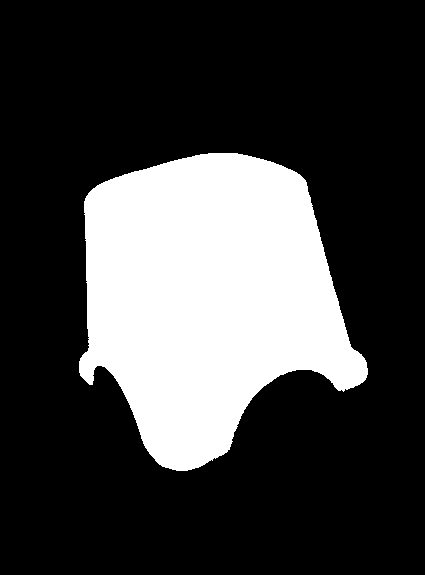

In [14]:
cv2.drawContours(mask,[chair_contour],0,(255,255,255),-1)
cv2_imshow(mask)

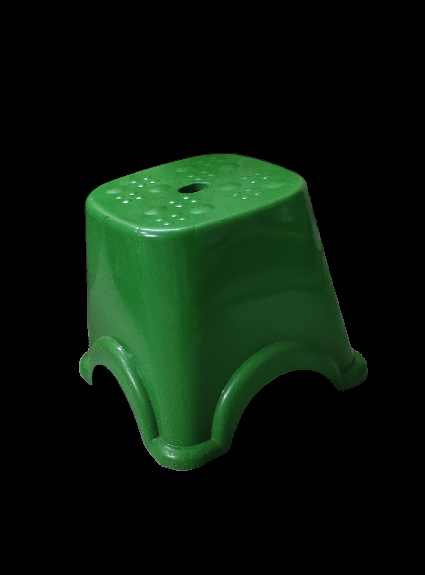

In [15]:
chair = cv2.bitwise_and(image,mask)
cv2_imshow(chair)

In [16]:
M = cv2.moments(chair_contour)

In [17]:
Area = M['m00']
int(Area)

61150

In [18]:
m10 = int(M['m10'])
m01 = int(M['m01'])
(m10,m01)

(12689871, 18138940)

In [19]:
Cx = int(m10/Area)
Cy = int(m01/Area)
(Cx,Cy)

(207, 296)

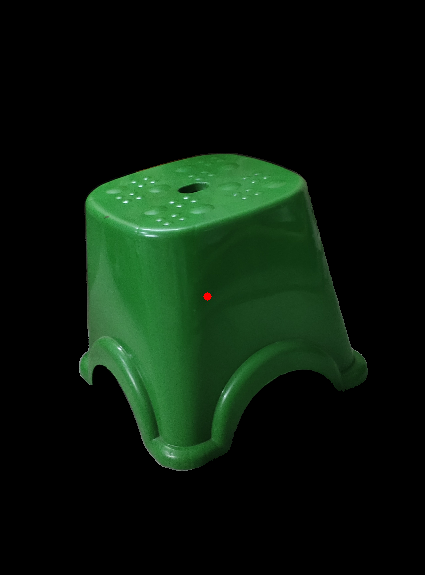

In [20]:
cv2.circle(chair,(Cx,Cy),4,(0,0,255),-1)
cv2_imshow(chair)

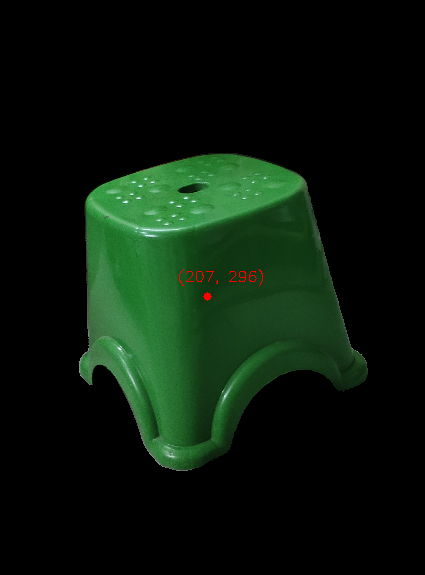

In [21]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(chair,f'{Cx,Cy}'.format(),(Cx-30,Cy-15), font, 0.5, (0,0,255), 1)
cv2_imshow(chair)